In [1]:
import numpy as np
import random

t = np.linspace(0, 6, 61)

# N1 

def n1():

    A = 0.5 + 0.1*random.random()
    w = 0.5 + random.random()
    ph = 2*np.pi * random.random()

    x = A*np.sin(t*w + ph) + A
    y = x/x.max() + 0.2 * random.random()
    return y

# N2
def n2():
    w0 = 1+4*random.random()
    gamma = random.random()

    x = t/np.sqrt((t**2 - w0**2)**2+gamma*t**2)
    y = x/x.max() + 0.2*random.random()

    return y


# x, y
n1()

array([0.22414983, 0.24500893, 0.2716651 , 0.30377764, 0.34093608,
       0.38266549, 0.42843251, 0.47765215, 0.52969531, 0.5838968 ,
       0.63956384, 0.69598491, 0.75243887, 0.80820415, 0.86256797,
       0.91483548, 0.96433862, 1.01044466, 1.0525643 , 1.09015917,
       1.12274876, 1.14991652, 1.17131521, 1.18667131, 1.19578854,
       1.19855039, 1.19492154, 1.18494837, 1.16875837, 1.14655846,
       1.1186324 , 1.08533712, 1.04709819, 1.00440437, 0.95780134,
       0.90788477, 0.85529267, 0.80069725, 0.74479633, 0.68830441,
       0.63194354, 0.5764341 , 0.5224856 , 0.47078758, 0.42200082,
       0.37674889, 0.33561019, 0.29911053, 0.26771644, 0.24182918,
       0.22177963, 0.20782405, 0.20014083, 0.19882816, 0.20390283,
       0.21529996, 0.23287389, 0.2564    , 0.28557757, 0.32003369,
       0.35932794])

In [2]:
# a = np.array([0, 1, 2])
# # for i in range(5000):
# a = np.concatenate((a, np.array([3, 4, 5])))
# a
# X, y = np.array([]), np.array([])

# X, y = np.ndarray(shape=(61,5000)), np.ndarray(shape=(61,))
# print(X.shape)
# for i in range(5000):
#     X = np.append(X, n1(), axis=1)
#     y = np.append(y, np.array([1]))


# for i in range(5000):


X, y = [], []

for i in range(100000):
    X.append(n1().tolist())
    y.append(0)
    X.append(n2().tolist())
    y.append(1)

# for i in range(1000000):
#     X.append(n2().tolist())
#     y.append(1)


# n1()
len(X[0])

61

In [3]:
def add_features(signal):
    """Добавить статистические признаки"""
    signal = np.array(signal)
    features = [
        signal.mean(),      # Среднее
        signal.std(),       # Стандартное отклонение
        signal.max(),       # Максимум
        signal.min(),       # Минимум
        signal.max() - signal.min(),  # Размах
    ]
    return list(signal) + features

# Применить к данным
X = [add_features(signal) for signal in X]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train[0][:10]

[np.float64(0.17993265658341717),
 np.float64(0.16607851514577363),
 np.float64(0.16054208659574012),
 np.float64(0.16341646919768124),
 np.float64(0.17465332853728227),
 np.float64(0.19406371029282277),
 np.float64(0.22132121761193346),
 np.float64(0.2559674996644025),
 np.float64(0.2974199590778219),
 np.float64(0.34498154865106545)]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[0][:10]

array([-0.4810526 , -0.54400659, -0.58532382, -0.60412074, -0.59994801,
       -0.5728343 , -0.52337678, -0.45291335, -0.36376981, -0.25936312])

In [6]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

def classification_comparison(X_train, X_test, y_train, y_test):
    """
    Сравнение разных методов классификации
    """
    models = {
        'LogReg': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'LogRegCV': LogisticRegressionCV(cv=5, max_iter=1000, class_weight='balanced'),
        # 'NaiveBayes': MultinomialNB(),
        'LinearSVM': LinearSVC(max_iter=1000, class_weight='balanced')
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        results[name] = accuracy
        print(f"{name}: {accuracy:.3f}")
    
    # Выбрать лучший
    best_model_name = max(results, key=results.get)
    best_model = models[best_model_name]
    
    print(f"\nЛучшая модель: {best_model_name}")
    return best_model

classification_comparison(X_train, X_test, y_train, y_test)  # i dont know what i expected

LogReg: 1.000
LogRegCV: 1.000
LinearSVM: 1.000

Лучшая модель: LogReg


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(max_iter=10000)

from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(
    cv=5,  # Кросс-валидация
    max_iter=20000,
    random_state=42
)

model.fit(X_train, y_train)

,Cs,10
,fit_intercept,True
,cv,5
,dual,False
,penalty,'l2'
,scoring,None
,solver,'lbfgs'
,tol,0.0001
,max_iter,20000
,class_weight,None
,n_jobs,None


In [8]:
from sklearn.metrics import accuracy_score, classification_report

# model.predict(X_test)[:10], y_test[:10]
accuracy_score(y_test, model.predict(X_test))

1.0

In [9]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19949
           1       1.00      1.00      1.00     20051

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



In [ ]:
import pandas as pd

df = pd.read_excel(r"WaveForm1.xlsx", header=None)
# interchange the index and columns axis
# df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.177648,0.234159,0.293202,0.357599,0.430761,0.516990,0.621533,0.749452,0.900538,1.055839,...,0.306201,0.303554,0.301017,0.298583,0.296246,0.293999,0.291838,0.289758,0.287754,0.285822
1,0.129535,0.121110,0.120907,0.128928,0.145041,0.168980,0.200351,0.238637,0.283207,0.333327,...,0.121283,0.130022,0.146835,0.171445,0.203447,0.242312,0.287400,0.337970,0.393186,0.452139
2,0.979992,0.945318,0.906582,0.864222,0.818715,0.770572,0.720336,0.668572,0.615865,0.562806,...,1.073798,1.082057,1.084715,1.081742,1.073171,1.059100,1.039686,1.015149,0.985764,0.951863
3,0.103583,0.106309,0.109045,0.111799,0.114583,0.117407,0.120280,0.123214,0.126221,0.129315,...,0.362020,0.341025,0.323351,0.308277,0.295269,0.283931,0.273961,0.265124,0.257236,0.250150
4,0.984549,1.014476,1.038516,1.056349,1.067735,1.072525,1.070654,1.062147,1.047117,1.025764,...,0.844570,0.891119,0.933424,0.970921,1.003112,1.029566,1.049931,1.063937,1.071396,1.072209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.117323,0.128801,0.140568,0.152936,0.166273,0.181035,0.197832,0.217515,0.241342,0.271270,...,0.176247,0.174896,0.173609,0.172382,0.171211,0.170091,0.169020,0.167993,0.167009,0.166064
5496,0.180971,0.191646,0.202404,0.213330,0.224511,0.236044,0.248032,0.260593,0.273860,0.287988,...,0.394950,0.387979,0.381491,0.375437,0.369773,0.364461,0.359468,0.354766,0.350330,0.346135
5497,0.023853,0.059336,0.095573,0.133362,0.173589,0.217283,0.265671,0.320245,0.382797,0.455393,...,0.206182,0.202112,0.198229,0.194519,0.190973,0.187577,0.184323,0.181202,0.178206,0.175326
5498,0.150723,0.155595,0.160487,0.165417,0.170406,0.175475,0.180645,0.185939,0.191384,0.197005,...,0.469283,0.449811,0.432707,0.417572,0.404088,0.392000,0.381104,0.371230,0.362241,0.354022


In [11]:
df.to_numpy().tolist()[0][:10]

[0.1776483691565508,
 0.2341585354707232,
 0.293202205590415,
 0.3575988640683206,
 0.4307607804417465,
 0.5169904586863749,
 0.6215332459040706,
 0.7494515132760475,
 0.9005376968941945,
 1.055838688852362]

In [12]:
X_train[0]

array([-0.4810526 , -0.54400659, -0.58532382, -0.60412074, -0.59994801,
       -0.5728343 , -0.52337678, -0.45291335, -0.36376981, -0.25936312,
       -0.14343503, -0.01684576,  0.12138062,  0.2702776 ,  0.42759791,
        0.59030563,  0.75664888,  0.92262172,  1.08562556,  1.24194204,
        1.38792739,  1.52056938,  1.6371947 ,  1.73472307,  1.80995931,
        1.8625178 ,  1.88799648,  1.88665524,  1.85821062,  1.8040314 ,
        1.72462654,  1.62131415,  1.49527952,  1.34869234,  1.1843987 ,
        1.00589839,  0.81552172,  0.61744586,  0.41543289,  0.21315044,
        0.01462046, -0.17607246, -0.35495899, -0.51849899, -0.66380791,
       -0.78829649, -0.88987997, -0.96768431, -1.02158542, -1.05256462,
       -1.06140552, -1.04491906, -0.99974031, -0.92656383, -0.82753677,
       -0.70527893, -0.56252743, -0.40207252, -0.22677638, -0.03959315,
        0.15642968,  0.54217863,  1.13396051,  1.04325553,  0.75070246,
        0.18100656])

In [13]:
ans = []
b = df.to_numpy().tolist()
b = [add_features(signal) for signal in b]
for i in b:
    i = np.array(i)
    # print(a, a.reshape(-1, 1))
    # print(scaler.transform(a.reshape(1, -1)))
    # a = scaler.transform(a.reshape(1, -1))
    # ans.append(model.predict(a).tolist()[0])

    ans.append(model.predict(scaler.transform(i.reshape(1, -1))).tolist()[0])
    # break

ans.count(1)

3210

Class 0: 100000
Class 1: 100000


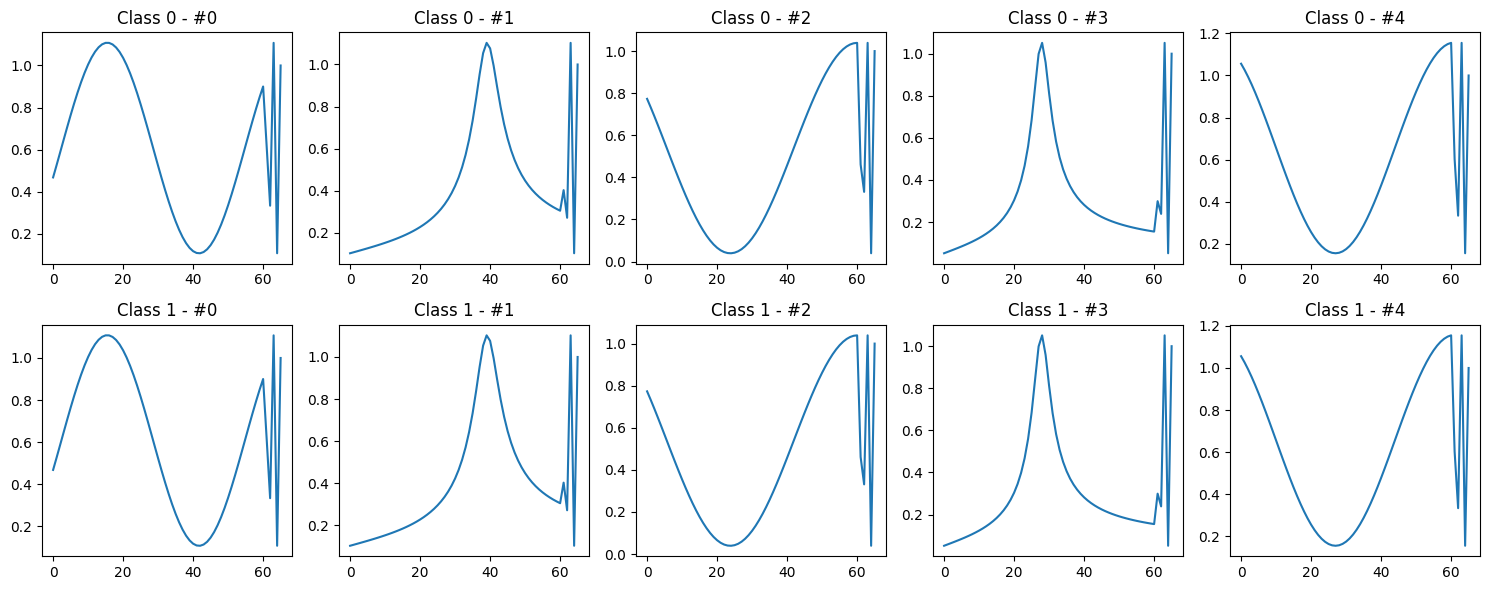

First training sample (before scaling): [-0.4810526  -0.54400659 -0.58532382 -0.60412074 -0.59994801]
First training sample (after scaling): [-2.279468   -2.50427824 -2.67292009 -2.78040455 -2.82261004]


In [14]:
# 1. Проверь распределение классов в обучающих данных
print(f"Class 0: {y.count(0)}")
print(f"Class 1: {y.count(1)}")

# 2. Посмотри на несколько примеров
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    # Класс 0
    axes[0, i].plot(X[i])
    axes[0, i].set_title(f"Class 0 - #{i}")
    
    # Класс 1
    axes[1, i].plot(X[i])
    axes[1, i].set_title(f"Class 1 - #{i}")
plt.tight_layout()
plt.show()

# 3. Проверь, что scaler применяется правильно
print("First training sample (before scaling):", X_train[0][:5])
print("First training sample (after scaling):", scaler.transform([X_train[0]])[0][:5])